# Exoplanet Exploratory Data Analysis

In [1]:
import pandas as pd
from pandarallel import pandarallel
from pyvo.dal import TAPService
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

pandarallel.initialize(progress_bar=True)
#%matplotlib inline
sns.set_style("dark")

INFO: Pandarallel will run on 20 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [2]:
try:
    df = pd.read_pickle("./data/planets.pkl")  #
except FileNotFoundError:
    service = TAPService("https://exoplanetarchive.ipac.caltech.edu/TAP")
    results = service.search("SELECT * FROM pscomppars")
    df: pd.DataFrame = results.to_table().to_pandas(index=True)
    # df.drop(columns=df.columns[0], axis=1, inplace=True)
    df.to_pickle(
        "./data/planets.pkl",
    )  # cache

In [3]:
df.drop(columns=df.filter(like="reflink").columns, inplace=True)
df.drop(columns=df.filter(like="str").columns[1:], inplace=True)
df.drop(columns="disc_refname", inplace=True)
#df.info(memory_usage=True, show_counts=True, verbose=True)

In [4]:
# df.info(verbose=True)


Exploratory Data Analysis

In [5]:
# How many exoplanets are there? of these exoplanets, how many exoplanets have their existence marked contrivercial?
df["pl_name"].count()
# Contrivercial
df["pl_controv_flag"].filter(like="1").count()

#sns.barplot(x=)

1982

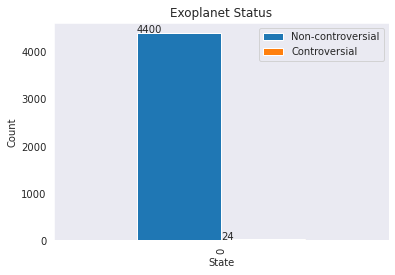

In [6]:
# plt.bar(x=["Non-controversial", "controv"], height=[non_controv_count,controv_count],log=True)
# plt.show()
controv_df = pd.DataFrame(
    {"Non-controversial": (df.pl_controv_flag == 0).sum(), "Controversial": (df.pl_controv_flag == 1).sum()}, index=[0])
ax = controv_df.plot(kind="bar")
ax.set_title("Exoplanet Status")
ax.set_xlabel("State")
ax.set_ylabel("Count")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

In [7]:
controv_df = pd.DataFrame(df.iloc[df[df["pl_controv_flag"] == 1].index], columns=df.columns)
controv_df.reset_index(inplace=True)
non_controv_df = pd.DataFrame(df.iloc[df[df["pl_controv_flag"] == 0].index], columns=df.columns).reset_index(drop=True)

Which telescopes/observatories (i.e., facility) have found the most exoplanets?

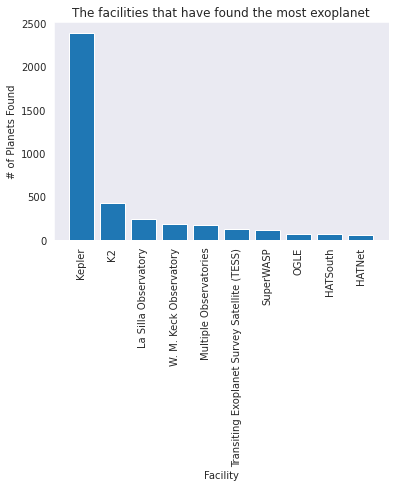

In [8]:
disc_facility_count = non_controv_df["disc_facility"].value_counts()
disc_facility_count_keys = disc_facility_count.keys()
ax = plt.axes()
ax.bar(disc_facility_count_keys[:10], disc_facility_count[:10])
plt.xticks(rotation=90)
ax.set_xlabel("Facility")
ax.set_ylabel("# of Planets Found")
ax.set_title("The facilities that have found the most exoplanet")
plt.show()

In [9]:

c = Counter(non_controv_df["disc_facility"])
pd.DataFrame({"keys": c.keys(), "planets_found": c.values()}, ).sort_values(by="planets_found", ascending=False).head(
    10)
non_controv_df["disc_facility"].value_counts().head(10)
#

Kepler                                          2390
K2                                               426
La Silla Observatory                             242
W. M. Keck Observatory                           179
Multiple Observatories                           176
Transiting Exoplanet Survey Satellite (TESS)     128
SuperWASP                                        113
OGLE                                              69
HATSouth                                          69
HATNet                                            60
Name: disc_facility, dtype: int64

What technique found the most exoplanets?

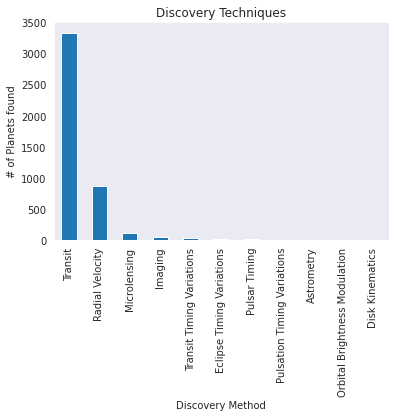

In [10]:
disc_method_counts = non_controv_df["discoverymethod"].value_counts()
#ax = plt.axes()
disc_method_counts.plot(kind="bar", title="Discovery Techniques", xlabel="Discovery Method",
                        ylabel="# of Planets found");

Are there any planets orbiting multi star systems?

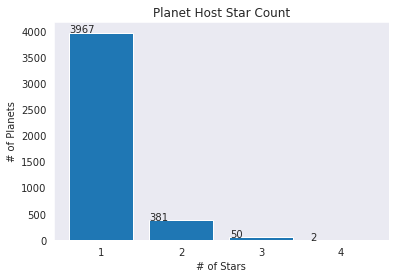

In [11]:
sys_types = non_controv_df["sy_snum"].value_counts()
ax = plt.axes()
ax.bar(sys_types.keys(), sys_types.values)
ax.set_title("Planet Host Star Count")
ax.set_ylabel("# of Planets")
ax.set_xlabel("# of Stars")
plt.xticks([1, 2, 3, 4])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()
#    plt.bar(x=[f'1: {sys_types[0]}', f'2: {sys_types[1]}', f'3{sys_types[2]}', f'4: {sys_types[3]}'],height=sys_types,)

In [12]:
sys_types.keys()

Int64Index([1, 2, 3, 4], dtype='int64')

What is the median number of planets that orbit a star(s) ?

The median number of planets that orbit a star(s) is 1.0, while the max is 8


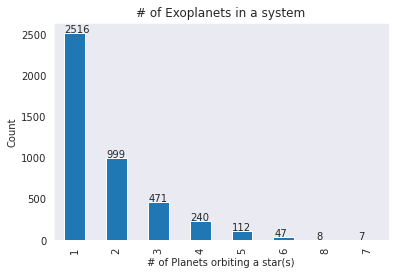

In [13]:
print(
    f'The median number of planets that orbit a star(s) is {non_controv_df["sy_pnum"].median()}, '
    f'while the max is {non_controv_df["sy_pnum"].max()}')
#sns.histplot(non_controv_df["sy_pnum"].value_counts().keys(),non_controv_df.value_counts().values)
ax=non_controv_df["sy_pnum"].value_counts().plot(kind="bar")
ax.set_xlabel("# of Planets orbiting a star(s)")
ax.set_ylabel("Count")
ax.set_title("# of Exoplanets in a system")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

It definitely seems like our solar system is a relative anomaly, with 8 planets and 3+ dwarf planets

When was the first exoplanet found?

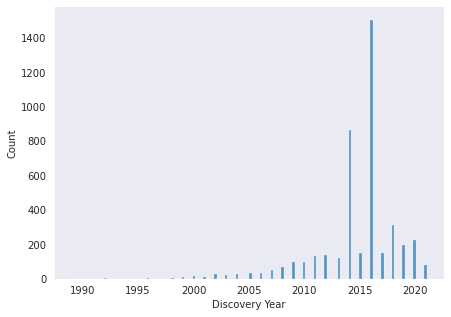

In [14]:
import matplotlib as mpl

non_controv_df["disc_year"].sort_values(ascending=True)
fig, ax = plt.subplots(figsize=(7, 5))
sns.despine(fig)
ax.set_xlabel("Discovery Year")
sns.histplot(non_controv_df["disc_year"].value_counts(), x=non_controv_df["disc_year"].values)
plt.show()

The first exoplanet was found in 1989

In [24]:
#pd.DataFrame(df.iloc[df[df["st_spectype"].filter()].index]
non_controv_df["st_spectype"].is_unique

False